# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
len(df)

1898

#### Observations:
  The dataset has 9 columns and 1898 rows

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


There are 4 columns with integers, 1 with float, and 4 object type, which are strings

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
The dataset does not have any missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The food prep time ranges from 20 to 35 minutes, and takes 27.37 minutes on average

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
Ratings were not given for  736 orders

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
# Write the code here
df['order_id'].nunique()

1898

In [ ]:
df['customer_id'].nunique()


1200

In [ ]:
df['restaurant_name'].nunique()


178

In [ ]:
df['cuisine_type'].nunique()

14

<Axes: xlabel='cuisine_type', ylabel='count'>

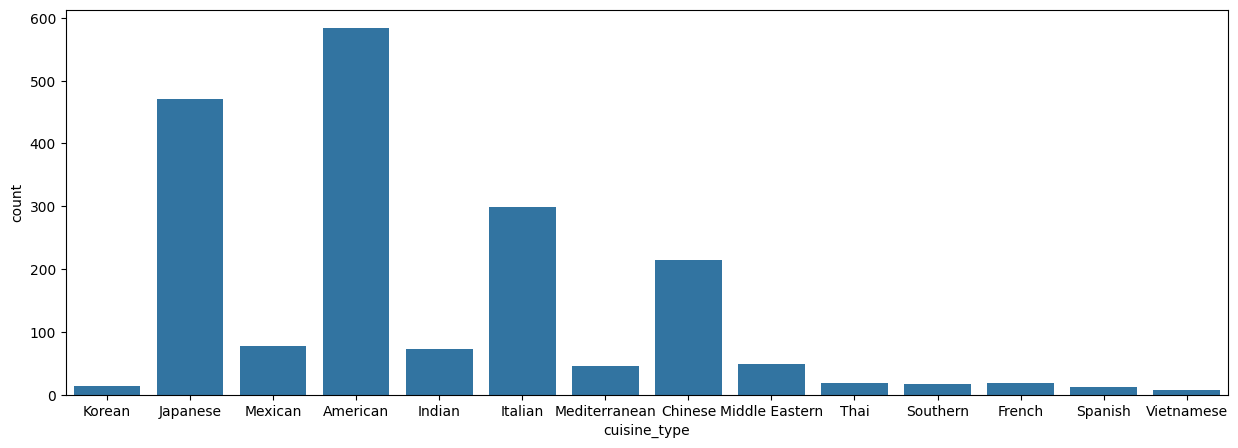

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

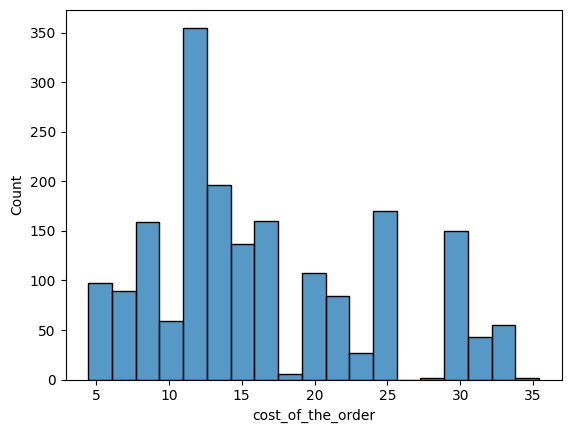

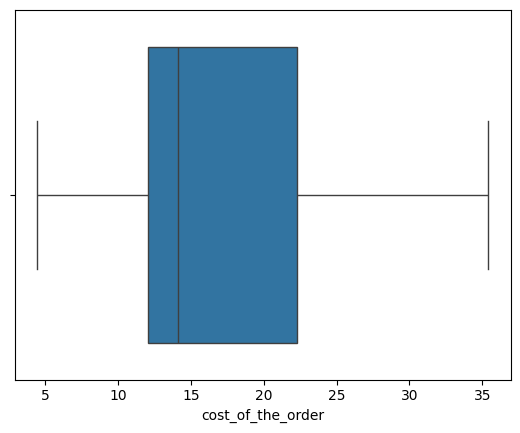

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

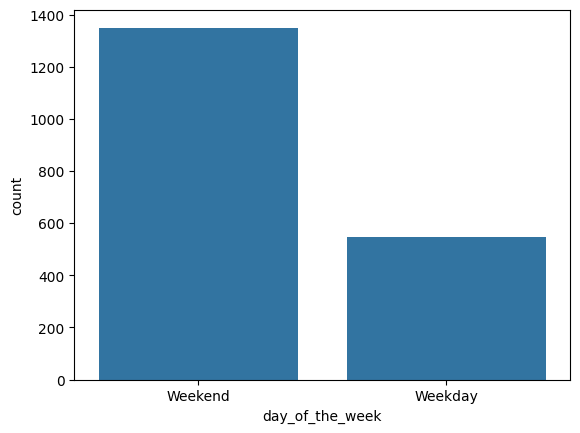

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week')

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

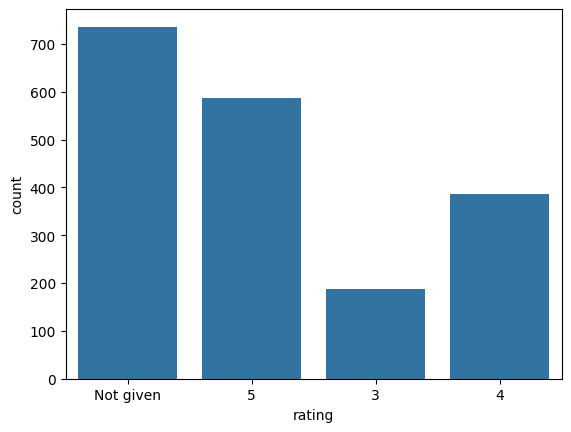

In [ ]:
sns.countplot(data = df, x = 'rating')

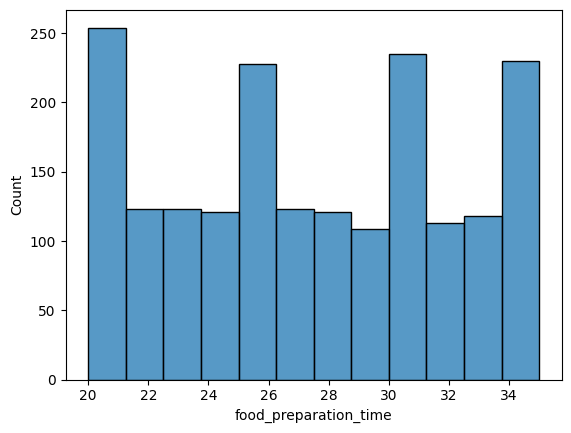

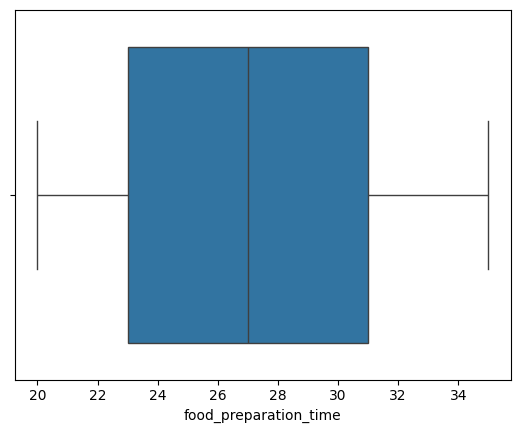

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

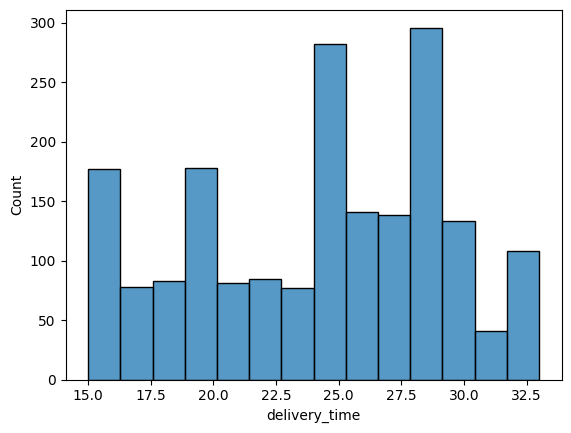

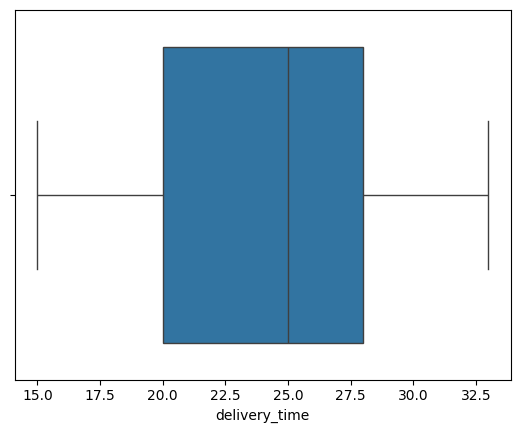

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

**Observations from univariate analysis:**

There are 12 unique customers in the dataset, who ordered from 178 unique restaurants serving 14 differnt types of cuisine.

The most popular cuisines were American, Japanaese, Italian and Chinese.

The cost of orders ranged from $5 to $35, with an average cost of about $16.50 and median cost of about $14.

About 2/3 of orders were placed on weekend days.

Roughly 60% of orders were rated either 5, 4, or 3, in that order of frequency.

Most restaurants took 27 to 31 minutes to prepare the food, with prep times evenly distributed.

Delivery time ranged from 15 to 31 minutes, with an average of 24 minutes, but the majority took longer than 25 minutes.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The 5 restaurants with the frequent orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American is the most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
df_greater_than_20 = df[df['cost_of_the_order']>20]
print ((df_greater_than_20.shape[0] / df.shape[0]) * 100)

29.24130663856691


#### Observations:
Roughly 30% of orders cost more than $20

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
#print(df['delivery_time'].mean)
print(df['delivery_time'].mean(axis=0))


24.161749209694417


#### Observations:
The average order delivery time was about 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(25)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
241719     5
97806      5
142461     5
94152      5
232035     5
229946     5
186473     5
125123     5
114085     5
64153      5
Name: customer_id, dtype: int64

#### Observations:
The top three customers ordered 13, 10 and 9 times, respectively

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

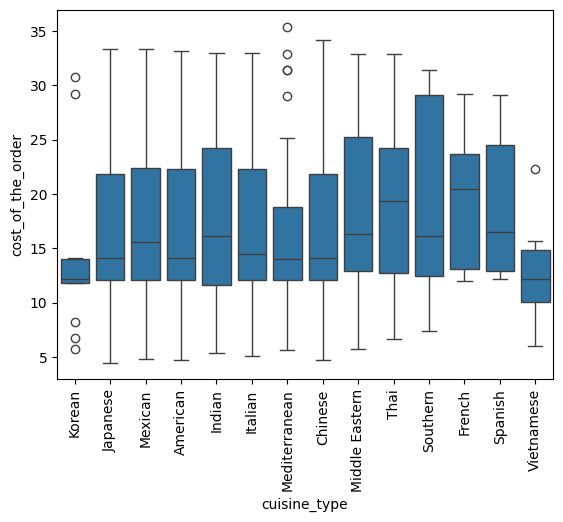

In [ ]:
# Write the code here
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

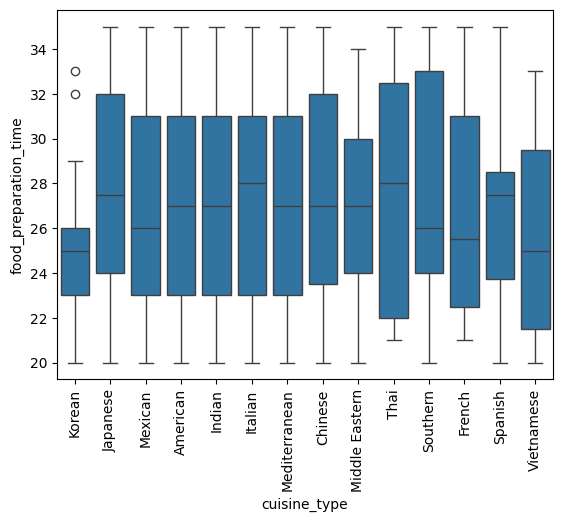

In [ ]:
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 90)

([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

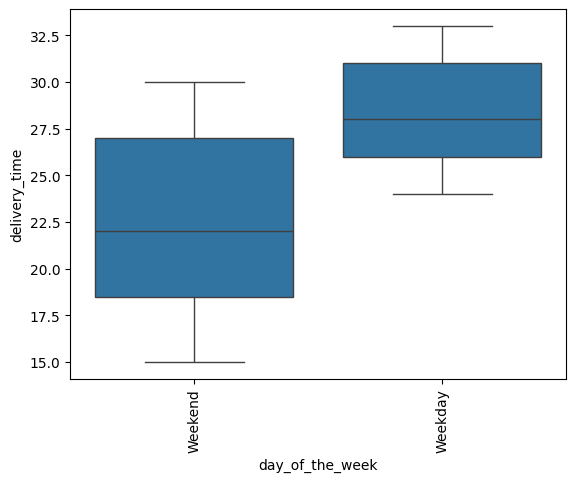

In [ ]:
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xticks(rotation = 90)

<Axes: xlabel='rating', ylabel='food_preparation_time'>

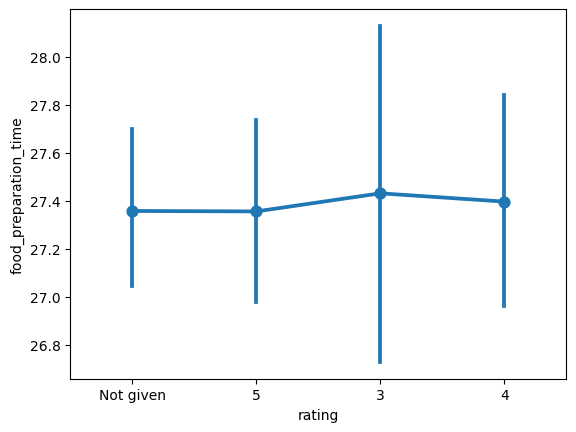

In [ ]:
sns.pointplot(x = "rating", y = "food_preparation_time", data = df)

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

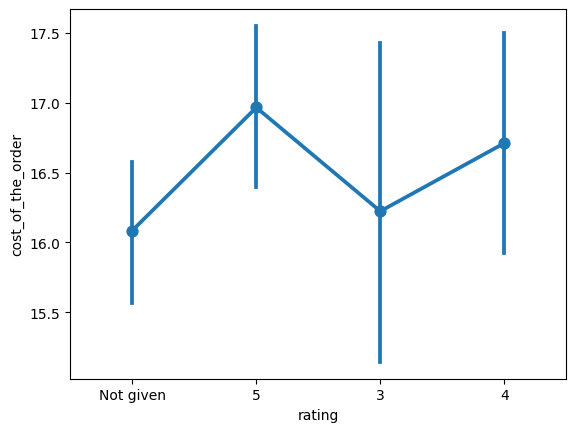

In [ ]:
sns.pointplot(x = "rating", y = "cost_of_the_order", data = df)

<Axes: >

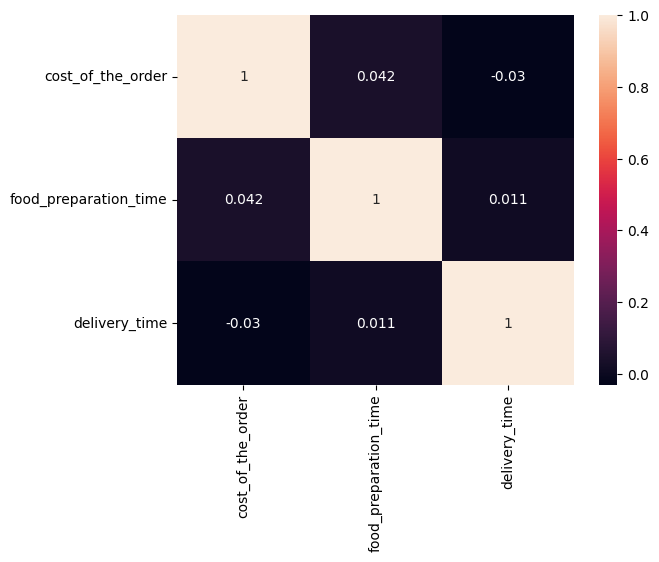

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[col_list].corr(), annot=True)

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

In [ ]:
print(df['cost_of_the_order'].sum())

31314.82


In [99]:
df.groupby(['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending = False).head(20)

restaurant_name
Kambi Ramen House             32.930000
Emporio                       31.430000
Bhatti Indian Grill           31.115000
Haru Gramercy Park            29.830000
Lucky Strike                  29.250000
Il Bambino                    29.250000
Sarabeth's                    29.133333
Rohm Thai                     29.100000
Klong                         29.050000
67 Burger                     29.050000
Song Thai Restaurant & Bar    26.700000
Socarrat Paella Bar           25.220000
Byblos Restaurant             24.735000
Posto                         24.250000
Philippe Chow                 24.200000
Kanoyama                      23.686667
Carmine's                     23.653333
Junoon                        23.050000
Bistango                      23.040000
Delicatessen                  22.786000
Name: cost_of_the_order, dtype: float64

**Observations from multivariate analysis:**

The highest cost of order cuisines were Thai, French, and Italian, and the lowest were Korean and Vietnamese.

The cuisine with the shortest and most reliable preparation time was Korean, while the one with the highest variability was Thai.

Delivery times are longer on weekdays, but more variable on weekends.

Ratings are not directly correlated with food preparation time or cost of order.

Food prep time has a small positive correltation with cost of the order and delivery time.

Customers spent about $31,315, with the top five restaurants accounting for about one-third of purchases and 11% spent at the top restaurant, Shake Shack.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


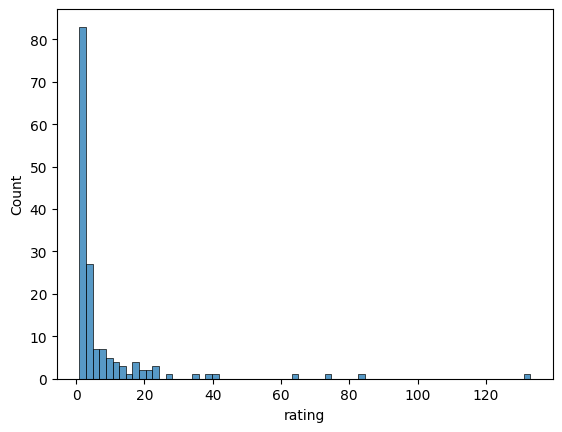

In [ ]:
sns.histplot(data=df_rating_count,x='rating')
plt.show()

In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names_50ratings = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
rest_names_50ratings.head()



0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [ ]:
# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_rating=df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()
df_mean_rating.head(25)

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
5,Socarrat Paella Bar,5.0
6,DespaÌ±a,5.0
7,Dig Inn Seasonal Market,5.0
8,Saravanaa Bhavan,5.0
9,Donburi-ya,5.0


In [ ]:
# Check the mean rating for the four restaurants with over 50 ratings
df_mean_rating[df_mean_rating['restaurant_name'] =='Shake Shack']


,restaurant_name,rating
93,Shake Shack,4.278195


In [ ]:
df_mean_rating[df_mean_rating['restaurant_name'] =='The Meatball Shop']


,restaurant_name,rating
66,The Meatball Shop,4.511905


In [ ]:
df_mean_rating[df_mean_rating['restaurant_name'] =='Blue Ribbon Sushi']


,restaurant_name,rating
101,Blue Ribbon Sushi,4.219178


In [ ]:
df_mean_rating[df_mean_rating['restaurant_name'] =='Blue Ribbon Fried Chicken']

,restaurant_name,rating
89,Blue Ribbon Fried Chicken,4.328125


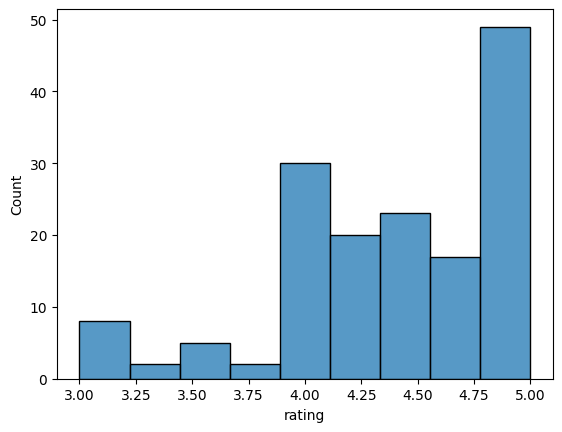

In [ ]:
sns.histplot(data=df_mean_rating,x='rating')
plt.show()

#### Observations:
There are four restaurants that had more than 50 orders and they all have an average rating higher than 4: Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [96]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev).sort_values(ascending = False)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [98]:
df_revenue=df.groupby(['restaurant_name'])['Revenue'].sum().sort_values(ascending = False).reset_index().dropna()
df_revenue.head(25)

,restaurant_name,Revenue
0,Shake Shack,703.6070
1,The Meatball Shop,419.8285
2,Blue Ribbon Sushi,360.4605
3,Blue Ribbon Fried Chicken,340.2035
4,Parm,218.5570
5,RedFarm Broadway,191.4675
6,RedFarm Hudson,180.9340
7,TAO,167.3570
8,Han Dynasty,149.3985
9,Rubirosa,140.8085


In [ ]:
print(df['Revenue'].sum())


6166.303


#### Observations:
The total revenue is about $6,166

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']




In [ ]:
df_time_greater_than_60 = df[df['total_time']>60]
print ((df_time_greater_than_60.shape[0] / df.shape[0]) * 100)

10.537407797681771


#### Observations:
Over 10% of orders take more than 60 minutes to be delivered, after the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
print(df_weekend['delivery_time'].mean(axis=0))

22.4700222057735


In [ ]:
df_weekday = df[df['day_of_the_week'] == 'Weekday']
print(df_weekday['delivery_time'].mean(axis=0))

28.340036563071298


#### Observations:
While the average delivery time on weekdays is about 28 minutes, the average delivery time on weekends is only about 22 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  Shake Shack is the top performing restaurant in terms of number of orders, customer spending, and consistent high ratings (over 4).

*  This promotion will support them and three other restaurants with potential to improve performance to this level.

*  The highest cost of order cuisines (and therefore revenue producing) were Thai, French, and Italian.

*  Customer ratings are not significantly related to factors we can affect, like delivery time, but most likely to factors we cannot impact, like food quality.



### Recommendations:

*  Recommend a promotion targeting Thai, French and Italian restaurants with orders with an average order expenditure over $25, including:

  *   Kambi Ramen House
  *   Emporio
  *   Haru Gramercy Park
  *   Il Bambino
  *   Rohm Thai
  *   Song Thai Restaurant & Bar                     

*  There are many restaurants where only 1 order has been placed but the customer has given a rating of 5. A new promotional offer should be developed to increase the number of orders from these highly rated restaurants.

*  Similarly, many customers have only submitted 1 order, so a promotional offer targeting these customers would increase business.

*  10% of orders are taking over 1 hour to get to the customer, which is unacceptably high. Recommend further investigation into why, for example delivery staff levels on weekdays vs weekends, and individual restaurant prep times.

---